In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns


In [2]:
#reading in raw data 

accident = pd.read_csv('accident.csv')
person = pd.read_csv('person.csv')
acc_loc = pd.read_csv('acc-loc.csv')
atmos_cond = pd.read_csv('atmos_cond.csv')
node = pd.read_csv('node.csv')
road_surface = pd.read_csv('road_surface_cond.csv')
vehicle = pd.read_csv('vehicle.csv')


C:\Users\saidj\AppData\Local\Temp\ipykernel_9364\3948561558.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  person = pd.read_csv('person.csv')


In [3]:
# joining tables 

base = pd.merge(person, accident, on='ACCIDENT_NO', how='left')
base = pd.merge(base, road_surface, on='ACCIDENT_NO', how='left')
base = pd.merge(base, acc_loc, on='ACCIDENT_NO', how='left')
base = pd.merge(base, node, on='ACCIDENT_NO', how='left')
base = pd.merge(base, atmos_cond, on='ACCIDENT_NO', how='left')
base = pd.merge(base, vehicle[['ACCIDENT_NO', 'VEHICLE_ID', 'VEHICLE_YEAR_MANUF', 'Road Surface Type Desc',
                               'Vehicle Type Desc', 'TOTAL_NO_OCCUPANTS', 'Traffic Control Desc']], 
                on=['ACCIDENT_NO', 'VEHICLE_ID'], how='left')

In [4]:
base.head()

,ACCIDENT_NO,VEHICLE_ID,SEX,AGE,Age Group,Inj Level Desc,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE,Road User Type Desc,...,DEG_URBAN_NAME,Lat,Long,POSTCODE_NO,Atmosph Cond Desc,VEHICLE_YEAR_MANUF,Road Surface Type Desc,Vehicle Type Desc,TOTAL_NO_OCCUPANTS,Traffic Control Desc
0,T20060000010,A,F,NaN,unknown,Not injured,LF,1,3,Passengers,...,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights
1,T20060000010,C,M,43.0,40-49,Not injured,LF,1,3,Passengers,...,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights
2,T20060000010,C,M,22.0,22-25,Not injured,LR,1,3,Passengers,...,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights
3,T20060000010,A,M,72.0,70+,Not injured,D,1,2,Drivers,...,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights
4,T20060000010,B,F,62.0,60-64,Other injury,D,1,2,Drivers,...,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights


In [5]:
base.columns = base.columns.str.lower().str.replace(' ', '_')

In [6]:
base = base[base['road_user_type_desc'].isin(['Drivers', 'Motorcyclists','Bicyclists'])]

In [7]:
base.columns

Index(['accident_no', 'vehicle_id', 'sex', 'age', 'age_group',
       'inj_level_desc', 'seating_position', 'helmet_belt_worn',
       'road_user_type', 'road_user_type_desc', 'accidentdate', 'accidenttime',
       'accident_type_desc', 'day_week_description', 'dca_description',
       'light_condition_desc', 'no_of_vehicles', 'no_persons',
       'no_persons_killed', 'road_geometry', 'road_geometry_desc', 'severity',
       'speed_zone', 'surface_cond_desc', 'road_route_1', 'road_name',
       'road_type', 'distance_location', 'lga_name', 'region_name',
       'deg_urban_name', 'lat', 'long', 'postcode_no', 'atmosph_cond_desc',
       'vehicle_year_manuf', 'road_surface_type_desc', 'vehicle_type_desc',
       'total_no_occupants', 'traffic_control_desc'],
      dtype='object')

In [8]:
base.shape

(391147, 40)

In [9]:
base.describe()

,age,no_of_vehicles,no_persons,no_persons_killed,road_geometry,severity,speed_zone,road_route_1,distance_location,lat,long,postcode_no,vehicle_year_manuf,total_no_occupants
count,379441.000000,391147.000000,391147.000000,391147.000000,391147.000000,391147.000000,391147.000000,390007.000000,390007.000000,389966.000000,389966.000000,389966.000000,368183.000000,391146.000000
mean,40.068501,2.088358,2.777646,0.017283,3.162310,2.652430,115.108519,6129.566413,102.129882,-37.741667,144.977604,3280.951652,1922.892684,1.325932
std,16.586386,0.906867,1.721212,0.147407,1.788881,0.508035,204.579619,2934.623632,339.834006,0.526266,0.723722,292.970226,393.256633,0.881075
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,30.000000,-1.000000,-1.000000,-39.032320,140.966178,3000.000000,0.000000,0.000000
25%,26.000000,2.000000,2.000000,0.000000,1.000000,2.000000,60.000000,2850.000000,0.000000,-37.944560,144.891920,3068.000000,1998.000000,1.000000
50%,37.000000,2.000000,2.000000,0.000000,2.000000,3.000000,60.000000,5733.000000,0.000000,-37.821539,145.017680,3166.000000,2004.000000,1.000000
75%,51.000000,2.000000,3.000000,0.000000,5.000000,3.000000,80.000000,9999.000000,62.000000,-37.732621,145.178129,3380.000000,2009.000000,1.000000
max,106.000000,21.000000,97.000000,11.000000,9.000000,4.000000,999.000000,9999.000000,63038.000000,-34.062380,149.756785,3996.000000,3001.000000,96.000000


In [10]:
base['inj_level_desc'].value_counts()

Not injured       179280
Other injury      146346
Serious injury     62653
Fatality            2852
Unknown               16
Name: inj_level_desc, dtype: int64

In [11]:
#based of crash stats user guide with inj_level_numeric of 4 is 'Not Injured'

base.loc[base['inj_level_desc'] == 'Unknown', 'inj_level_desc'] = 'Not injured'

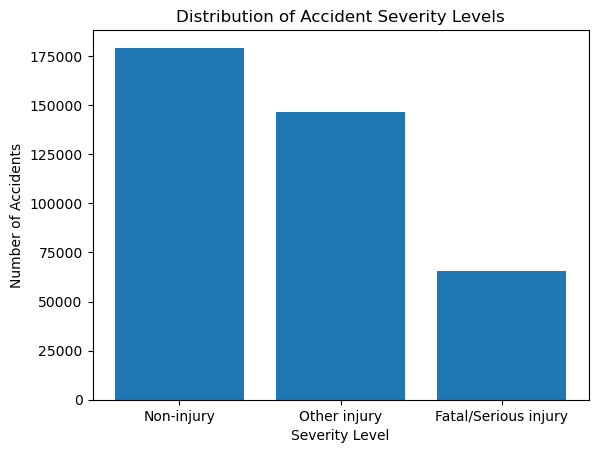

In [12]:
import matplotlib.pyplot as plt
# Create a new column 'severity_level' based on 'inj_level_desc'
base['severity_level'] = 0
base.loc[base['inj_level_desc'] == 'Not injured', 'severity_level'] = 1
base.loc[base['inj_level_desc'] == 'Other injury', 'severity_level'] = 2
base.loc[base['inj_level_desc'].isin(['Fatality', 'Serious injury']), 'severity_level'] = 3

# Plot a bar graph of severity levels
severity_counts = base['severity_level'].value_counts().sort_index()
severity_labels = ['Non-injury', 'Other injury', 'Fatal/Serious injury']

plt.bar(severity_labels, severity_counts)
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accident Severity Levels')
plt.show()

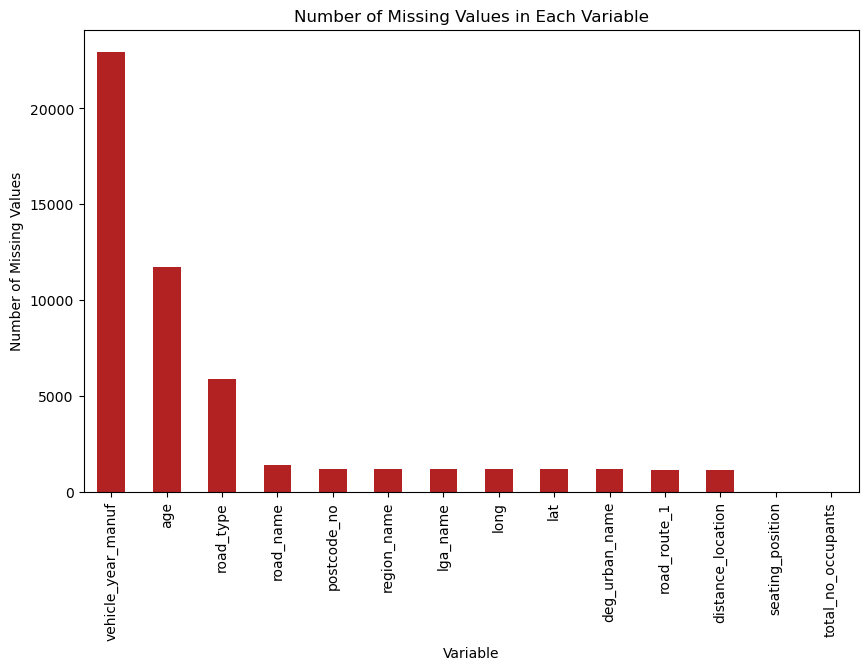

In [13]:
# checking for missing values

import matplotlib.pyplot as plt

missing_values = base.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]

fig, ax = plt.subplots(figsize=(10, 6))
missing_values.plot(kind='bar', color='#B22222', ax=ax)
ax.set_xlabel('Variable')
ax.set_ylabel('Number of Missing Values')
ax.set_title('Number of Missing Values in Each Variable')

plt.show()

In [14]:
base.head()

,accident_no,vehicle_id,sex,age,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,...,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level
3,T20060000010,A,M,72.0,70+,Not injured,D,1,2,Drivers,...,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1
4,T20060000010,B,F,62.0,60-64,Other injury,D,1,2,Drivers,...,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2
5,T20060000010,C,M,39.0,30-39,Not injured,D,1,2,Drivers,...,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1
8,T20060000018,A,M,30.0,30-39,Not injured,D,1,2,Drivers,...,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1
9,T20060000018,B,F,20.0,17-21,Other injury,D,1,2,Drivers,...,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2


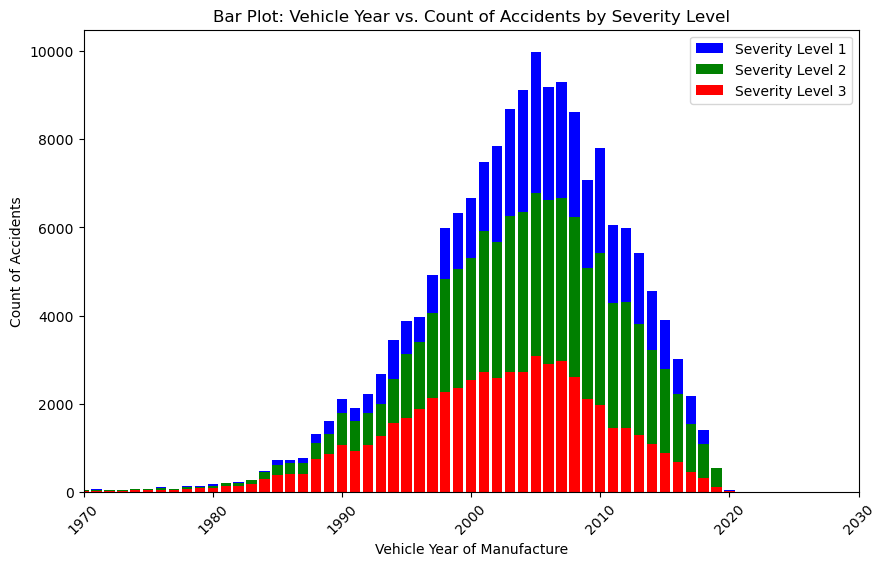

In [15]:
# Define colors for each severity level category
color_map = {
    1: 'blue',  # Non-injury accidents
    2: 'green',  # Other injury accidents
    3: 'red'  # Fatal/Serious injury accidents
}

# Group the data by 'vehicle_year_manuf' and count the number of accidents
grouped_data = base.groupby(['vehicle_year_manuf', 'severity_level'])['accident_no'].count().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))

# Iterate over each severity level category and plot the corresponding bars
for level in color_map:
    data = grouped_data[grouped_data['severity_level'] == level]
    plt.bar(data['vehicle_year_manuf'], data['accident_no'], color=color_map[level], label=f"Severity Level {level}")

# Set the labels and title
plt.xlabel('Vehicle Year of Manufacture')
plt.ylabel('Count of Accidents')
plt.title('Bar Plot: Vehicle Year vs. Count of Accidents by Severity Level')
plt.xticks(rotation=45)

# Set the x-axis limits
plt.xlim(1970, 2030)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [16]:
import scipy.stats as stats

# Assuming you have a DataFrame called 'base' with 'vehicle_year_manuf' and 'inj_level_desc' columns

# Convert 'vehicle_year_manuf' to numeric type
base['vehicle_year_manuf'] = pd.to_numeric(base['vehicle_year_manuf'], errors='coerce')

# Drop rows with missing values in 'vehicle_year_manuf' and 'inj_level_desc'
base_clean = base.dropna(subset=['vehicle_year_manuf', 'severity_level'])

# Calculate correlation coefficient (e.g., Pearson correlation)
correlation_coefficient, _ = stats.pearsonr(base_clean['vehicle_year_manuf'], base_clean['severity_level'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: -0.09450713341062361


In [17]:
# Convert 'accident_date' to datetime
base['accidentdate'] = pd.to_datetime(base['accidentdate'])

# Convert 'vehicle_year_manuf' to numeric
base['vehicle_year_manuf'] = pd.to_numeric(base['vehicle_year_manuf'], errors='coerce')

# Calculate the difference in years
base['year_of_vehicle'] = base['accidentdate'].dt.year - base['vehicle_year_manuf']

# Display the updated dataframe
base.head()

C:\Users\saidj\AppData\Local\Temp\ipykernel_9364\1711711444.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  base['accidentdate'] = pd.to_datetime(base['accidentdate'])


,accident_no,vehicle_id,sex,age,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
3,T20060000010,A,M,72.0,70+,Not injured,D,1,2,Drivers,...,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0
4,T20060000010,B,F,62.0,60-64,Other injury,D,1,2,Drivers,...,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0
5,T20060000010,C,M,39.0,30-39,Not injured,D,1,2,Drivers,...,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0
8,T20060000018,A,M,30.0,30-39,Not injured,D,1,2,Drivers,...,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0
9,T20060000018,B,F,20.0,17-21,Other injury,D,1,2,Drivers,...,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0


In [18]:
# Create a new DataFrame without null values in 'vehicle_year_manuf'
df = base.dropna(subset=['vehicle_year_manuf'])

# Convert 'accident_date' to datetime
df['accidentdate'] = pd.to_datetime(df['accidentdate'])

# Convert 'vehicle_year_manuf' to numeric
df['vehicle_year_manuf'] = pd.to_numeric(df['vehicle_year_manuf'], errors='coerce')

# Calculate the difference in years
df['year_of_vehicle'] = df['accidentdate'].dt.year - df['vehicle_year_manuf']

# Display the updated dataframe
df.head()

C:\Users\saidj\AppData\Local\Temp\ipykernel_9364\3226492037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['accidentdate'] = pd.to_datetime(df['accidentdate'])
C:\Users\saidj\AppData\Local\Temp\ipykernel_9364\3226492037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_year_manuf'] = pd.to_numeric(df['vehicle_year_manuf'], errors='coerce')
C:\Users\saidj\AppData\Local\Temp\ipykernel_9364\3226492037.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,accident_no,vehicle_id,sex,age,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
3,T20060000010,A,M,72.0,70+,Not injured,D,1,2,Drivers,...,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0
4,T20060000010,B,F,62.0,60-64,Other injury,D,1,2,Drivers,...,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0
5,T20060000010,C,M,39.0,30-39,Not injured,D,1,2,Drivers,...,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0
8,T20060000018,A,M,30.0,30-39,Not injured,D,1,2,Drivers,...,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0
9,T20060000018,B,F,20.0,17-21,Other injury,D,1,2,Drivers,...,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0


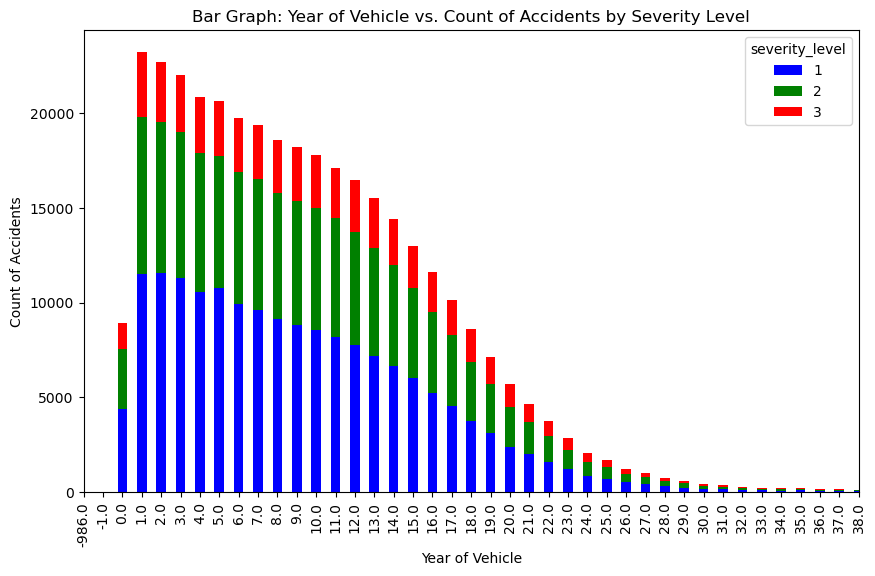

In [19]:
# Group the data by 'year_of_vehicle' and 'severity_level' and count the number of accidents
grouped_data = df.groupby(['year_of_vehicle', 'severity_level'])['accident_no'].count().reset_index()

# Pivot the data to have 'severity_level' as columns and 'year_of_vehicle' as index
pivot_data = grouped_data.pivot(index='year_of_vehicle', columns='severity_level', values='accident_no')

# Set the colors for each severity level category
colors = ['blue', 'green', 'red']

# Plot the bar graph
pivot_data.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Set the labels and title
plt.xlabel('Year of Vehicle')
plt.ylabel('Count of Accidents')
plt.title('Bar Graph: Year of Vehicle vs. Count of Accidents by Severity Level')

plt.xlim(0,40)
# Show the plot
plt.show()

In [22]:
 base.dropna(subset=['severity_level', 'year_of_vehicle']).groupby('severity_level')['year_of_vehicle'].mean()

severity_level
1     44.154349
2    133.226264
3    124.849380
Name: year_of_vehicle, dtype: float64

In [20]:
#dropping age, as we already have age_group
base.drop('age', axis=1, inplace=True)

In [21]:
base.dtypes

accident_no                       object
vehicle_id                        object
sex                               object
age_group                         object
inj_level_desc                    object
seating_position                  object
helmet_belt_worn                  object
road_user_type                    object
road_user_type_desc               object
accidentdate              datetime64[ns]
accidenttime                      object
accident_type_desc                object
day_week_description              object
dca_description                   object
light_condition_desc              object
no_of_vehicles                     int64
no_persons                         int64
no_persons_killed                  int64
road_geometry                      int64
road_geometry_desc                object
severity                           int64
speed_zone                         int64
surface_cond_desc                 object
road_route_1                     float64
road_name       

In [22]:
base['accident_no'] = base['accident_no'].astype(str)
base['vehicle_id'] = base['vehicle_id'].astype(str)
base['age_group'] = base['age_group'].astype(str)
base['accidentdate'] = pd.to_datetime(base['accidentdate'])
base['accidenttime'] = pd.to_datetime(base['accidenttime'], format='%H:%M:%S').dt.time
base['accident_type_desc'] = base['accident_type_desc'].astype(str)
base['day_week_description'] = base['day_week_description'].astype(str)
base['dca_description'] = base['dca_description'].astype(str)
base['light_condition_desc'] = base['light_condition_desc'].astype(str)
base['road_geometry_desc'] = base['road_geometry_desc'].astype(str)
base['surface_cond_desc'] = base['surface_cond_desc'].astype(str)
base['road_name'] = base['road_name'].astype(str)
base['road_type'] = base['road_type'].astype(str)
base['lga_name'] = base['lga_name'].astype(str)
base['region_name'] = base['region_name'].astype(str)
base['deg_urban_name'] = base['deg_urban_name'].astype(str)
base['atmosph_cond_desc'] = base['atmosph_cond_desc'].astype(str)
base['road_surface_type_desc'] = base['road_surface_type_desc'].astype(str)
base['vehicle_type_desc'] = base['vehicle_type_desc'].astype(str)
base['traffic_control_desc'] = base['traffic_control_desc'].astype(str)
base['no_of_vehicles'] = base['no_of_vehicles'].astype(int)
base['no_persons'] = base['no_persons'].astype(int)
base['no_persons_killed'] = base['no_persons_killed'].astype(int)
base['road_geometry'] = base['road_geometry'].astype(int)
base['severity'] = base['severity'].astype(int)
base['speed_zone'] = base['speed_zone'].astype(int)


In [24]:
base.dtypes

accident_no                       object
vehicle_id                        object
sex                               object
age_group                         object
inj_level_desc                    object
seating_position                  object
helmet_belt_worn                  object
road_user_type                    object
road_user_type_desc               object
accidentdate              datetime64[ns]
accidenttime                      object
accident_type_desc                object
day_week_description              object
dca_description                   object
light_condition_desc              object
no_of_vehicles                     int32
no_persons                         int32
no_persons_killed                  int32
road_geometry                      int32
road_geometry_desc                object
severity                           int32
speed_zone                         int32
surface_cond_desc                 object
road_route_1                     float64
road_name       

In [25]:
base.isnull().sum()

accident_no                   0
vehicle_id                    0
sex                           0
age_group                     0
inj_level_desc                0
seating_position              3
helmet_belt_worn              0
road_user_type                0
road_user_type_desc           0
accidentdate                  0
accidenttime                  0
accident_type_desc            0
day_week_description          0
dca_description               0
light_condition_desc          0
no_of_vehicles                0
no_persons                    0
no_persons_killed             0
road_geometry                 0
road_geometry_desc            0
severity                      0
speed_zone                    0
surface_cond_desc             0
road_route_1               1140
road_name                     0
road_type                     0
distance_location          1140
lga_name                      0
region_name                   0
deg_urban_name                0
lat                        1181
long    

In [26]:
base['total_no_occupants'].isnull()

3         False
4         False
5         False
8         False
9         False
          ...  
550573    False
550574    False
550575    False
550576    False
550577    False
Name: total_no_occupants, Length: 391147, dtype: bool

In [27]:
base[base['total_no_occupants'].isnull()]

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
455080,T20170019588,D,M,40-49,Not injured,D,9,2,Drivers,2017-10-14,...,145.264007,3976.0,Clear,2014.0,Paved,Station Wagon,NaN,No control,1,3.0


just 1 value got to frop

In [28]:
base = base.dropna(subset=['total_no_occupants'])

In [29]:
base.isnull().sum()

accident_no                   0
vehicle_id                    0
sex                           0
age_group                     0
inj_level_desc                0
seating_position              3
helmet_belt_worn              0
road_user_type                0
road_user_type_desc           0
accidentdate                  0
accidenttime                  0
accident_type_desc            0
day_week_description          0
dca_description               0
light_condition_desc          0
no_of_vehicles                0
no_persons                    0
no_persons_killed             0
road_geometry                 0
road_geometry_desc            0
severity                      0
speed_zone                    0
surface_cond_desc             0
road_route_1               1140
road_name                     0
road_type                     0
distance_location          1140
lga_name                      0
region_name                   0
deg_urban_name                0
lat                        1181
long    

In [30]:
base[base['road_route_1'].isnull()]

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
124,T20060000265,A,F,30-39,Other injury,D,1,2,Drivers,2006-01-20,...,NaN,NaN,Clear,1979.0,Gravel,Car,4.0,No control,2,27.0
797,T20060001419,A,F,22-25,Other injury,D,1,2,Drivers,2006-08-02,...,NaN,NaN,Clear,2005.0,Paved,Car,1.0,No control,2,1.0
798,T20060001419,B,F,26-29,Other injury,D,1,2,Drivers,2006-08-02,...,NaN,NaN,Clear,1993.0,Paved,Car,1.0,No control,2,13.0
799,T20060001419,C,F,30-39,Other injury,D,1,2,Drivers,2006-08-02,...,NaN,NaN,Clear,2005.0,Paved,Car,1.0,No control,2,1.0
811,T20060001426,A,M,40-49,Other injury,D,6,4,Motorcyclists,2006-02-01,...,NaN,NaN,Clear,2001.0,Unpaved,Motor Cycle,1.0,No control,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483950,T20180014906,B,F,30-39,Not injured,D,9,2,Drivers,2018-06-26,...,NaN,NaN,Not known,2012.0,Paved,Car,1.0,Unknown,1,6.0
496468,T20180023958,A,M,40-49,Other injury,D,9,2,Drivers,2018-05-14,...,NaN,NaN,Not known,2000.0,Paved,Car,1.0,No control,2,18.0
511640,T20190010303,A,M,30-39,Other injury,D,6,6,Bicyclists,2019-01-06,...,NaN,NaN,Clear,0.0,Paved,Bicycle,1.0,Unknown,2,2019.0
520688,T20190016778,A,U,unknown,Not injured,D,9,2,Drivers,2019-01-09,...,NaN,NaN,Clear,0.0,Paved,Utility,1.0,Unknown,1,2019.0


drop column, unuseful

In [31]:
base = base.drop('road_route_1', axis=1)

In [32]:
base.isnull().sum()

accident_no                   0
vehicle_id                    0
sex                           0
age_group                     0
inj_level_desc                0
seating_position              3
helmet_belt_worn              0
road_user_type                0
road_user_type_desc           0
accidentdate                  0
accidenttime                  0
accident_type_desc            0
day_week_description          0
dca_description               0
light_condition_desc          0
no_of_vehicles                0
no_persons                    0
no_persons_killed             0
road_geometry                 0
road_geometry_desc            0
severity                      0
speed_zone                    0
surface_cond_desc             0
road_name                     0
road_type                     0
distance_location          1140
lga_name                      0
region_name                   0
deg_urban_name                0
lat                        1181
long                       1181
postcode

In [33]:
base['road_user_type_desc'].value_counts()

Drivers          334362
Motorcyclists     33079
Bicyclists        23705
Name: road_user_type_desc, dtype: int64

filter the data points containing the variables ‘Drivers’ , ‘Motorcyclists’ and 'Bicyclists' of the Road
User Types to avoid any bias during analysis

In [34]:
base.shape

(391146, 40)

In [35]:
base['road_user_type_desc'].value_counts()

Drivers          334362
Motorcyclists     33079
Bicyclists        23705
Name: road_user_type_desc, dtype: int64

In [36]:
base.isnull().sum()

accident_no                   0
vehicle_id                    0
sex                           0
age_group                     0
inj_level_desc                0
seating_position              3
helmet_belt_worn              0
road_user_type                0
road_user_type_desc           0
accidentdate                  0
accidenttime                  0
accident_type_desc            0
day_week_description          0
dca_description               0
light_condition_desc          0
no_of_vehicles                0
no_persons                    0
no_persons_killed             0
road_geometry                 0
road_geometry_desc            0
severity                      0
speed_zone                    0
surface_cond_desc             0
road_name                     0
road_type                     0
distance_location          1140
lga_name                      0
region_name                   0
deg_urban_name                0
lat                        1181
long                       1181
postcode

In [37]:
base[base['seating_position'].isnull()]

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
431432,T20170003258,A,M,26-29,Other injury,NaN,8,4,Motorcyclists,2017-04-02,...,144.649484,3030.0,Not known,2010.0,Paved,Motor Cycle,1.0,No control,2,7.0
492281,T20180020946,A,M,64-69,Not injured,NaN,8,2,Drivers,2018-08-11,...,144.845747,3033.0,Clear,2005.0,Gravel,Car,1.0,No control,1,13.0
549017,T20200014240,A,F,50-59,Serious injury,NaN,9,6,Bicyclists,2020-07-27,...,143.976125,3232.0,Clear,0.0,Gravel,Bicycle,1.0,Unknown,3,2020.0


In [38]:
base['seating_position'] = base['seating_position'].fillna('D')

In [39]:
base.isnull().sum()

accident_no                   0
vehicle_id                    0
sex                           0
age_group                     0
inj_level_desc                0
seating_position              0
helmet_belt_worn              0
road_user_type                0
road_user_type_desc           0
accidentdate                  0
accidenttime                  0
accident_type_desc            0
day_week_description          0
dca_description               0
light_condition_desc          0
no_of_vehicles                0
no_persons                    0
no_persons_killed             0
road_geometry                 0
road_geometry_desc            0
severity                      0
speed_zone                    0
surface_cond_desc             0
road_name                     0
road_type                     0
distance_location          1140
lga_name                      0
region_name                   0
deg_urban_name                0
lat                        1181
long                       1181
postcode

In [40]:
base[base['lat'].isnull()]

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
124,T20060000265,A,F,30-39,Other injury,D,1,2,Drivers,2006-01-20,...,NaN,NaN,Clear,1979.0,Gravel,Car,4.0,No control,2,27.0
797,T20060001419,A,F,22-25,Other injury,D,1,2,Drivers,2006-08-02,...,NaN,NaN,Clear,2005.0,Paved,Car,1.0,No control,2,1.0
798,T20060001419,B,F,26-29,Other injury,D,1,2,Drivers,2006-08-02,...,NaN,NaN,Clear,1993.0,Paved,Car,1.0,No control,2,13.0
799,T20060001419,C,F,30-39,Other injury,D,1,2,Drivers,2006-08-02,...,NaN,NaN,Clear,2005.0,Paved,Car,1.0,No control,2,1.0
811,T20060001426,A,M,40-49,Other injury,D,6,4,Motorcyclists,2006-02-01,...,NaN,NaN,Clear,2001.0,Unpaved,Motor Cycle,1.0,No control,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550559,T20200019069,A,M,22-25,Serious injury,D,1,2,Drivers,2020-10-30,...,NaN,NaN,Clear,2002.0,Paved,Car,1.0,No control,3,18.0
550561,T20200019088,A,M,64-69,Not injured,D,9,2,Drivers,2020-10-30,...,NaN,NaN,Clear,2006.0,Paved,Utility,1.0,No control,1,14.0
550574,T20200019250,A,M,40-49,Not injured,D,1,2,Drivers,2020-01-11,...,NaN,NaN,Clear,2007.0,Paved,Car,1.0,Giveway sign,1,13.0
550575,T20200019250,B,M,50-59,Serious injury,D,6,4,Motorcyclists,2020-01-11,...,NaN,NaN,Clear,2007.0,Paved,Motor Cycle,1.0,No control,3,13.0


In [41]:
#check if road name has same long lat details 

base[base['road_name']== 'PHILLIP ISLAND']

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
342,T20060000549,A,F,40-49,Other injury,D,1,2,Drivers,2006-01-27,...,145.268340,3923.0,Clear,1996.0,Gravel,Car,1.0,No control,2,10.0
343,T20060000549,A,F,40-49,Other injury,D,1,2,Drivers,2006-01-27,...,145.268340,3923.0,Clear,1996.0,Gravel,Car,1.0,No control,2,10.0
1133,T20060001952,A,M,40-49,Other injury,D,1,2,Drivers,2006-10-02,...,145.238984,3922.0,Clear,2004.0,Paved,Utility,2.0,No control,2,2.0
1134,T20060001952,B,M,60-64,Other injury,D,1,2,Drivers,2006-10-02,...,145.238984,3922.0,Clear,1986.0,Paved,Rigid Truck(Weight Unknown),1.0,No control,2,20.0
3332,T20060004954,A,M,26-29,Other injury,D,1,2,Drivers,2006-03-03,...,145.340827,3925.0,Clear,1985.0,Paved,Car,2.0,Giveway sign,2,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546854,T20200010855,A,M,70+,Other injury,D,9,2,Drivers,2020-05-06,...,145.298207,3922.0,Clear,2013.0,Paved,Car,2.0,No control,2,7.0
546855,T20200010855,B,M,30-39,Not injured,D,1,2,Drivers,2020-05-06,...,145.298207,3922.0,Clear,2009.0,Paved,Heavy Vehicle (Rigid) > 4.5 Tonnes,2.0,No control,1,11.0
546856,T20200010855,C,M,70+,Not injured,D,9,2,Drivers,2020-05-06,...,145.298207,3922.0,Clear,2008.0,Paved,Car,3.0,No control,1,12.0
549525,T20200015261,A,F,40-49,Not injured,D,1,2,Drivers,2020-06-08,...,145.375410,3925.0,Clear,2014.0,Paved,Utility,2.0,No control,1,6.0


In [42]:
base.dropna(subset=['lat'], inplace=True)

not more, I can do to find long and lat details, low amount of records only 41 out 300000, no big affect 

In [43]:
base.shape


(389965, 40)

In [44]:
base.isnull().sum()

accident_no                   0
vehicle_id                    0
sex                           0
age_group                     0
inj_level_desc                0
seating_position              0
helmet_belt_worn              0
road_user_type                0
road_user_type_desc           0
accidentdate                  0
accidenttime                  0
accident_type_desc            0
day_week_description          0
dca_description               0
light_condition_desc          0
no_of_vehicles                0
no_persons                    0
no_persons_killed             0
road_geometry                 0
road_geometry_desc            0
severity                      0
speed_zone                    0
surface_cond_desc             0
road_name                     0
road_type                     0
distance_location             0
lga_name                      0
region_name                   0
deg_urban_name                0
lat                           0
long                          0
postcode

In [45]:
categorical_columns = ['sex', 'age_group', 'inj_level_desc', 'helmet_belt_worn', 'road_user_type', 'road_user_type_desc', 'accident_type_desc', 'day_week_description', 'dca_description', 'light_condition_desc', 'road_geometry_desc', 'surface_cond_desc', 'road_name', 'road_type', 'lga_name', 'region_name', 'deg_urban_name', 'atmosph_cond_desc', 'road_surface_type_desc', 'vehicle_type_desc', 'traffic_control_desc']

for column in categorical_columns:
    if 'Unknown' in base[column].unique():
        unknown_count = base[column].value_counts()['Unknown']
        print(f"Column: {column}, Unknown Count: {unknown_count}")
    else:
        print(f"Column: {column}, Unknown Count: 0")


Column: sex, Unknown Count: 0
Column: age_group, Unknown Count: 0
Column: inj_level_desc, Unknown Count: 0
Column: helmet_belt_worn, Unknown Count: 0
Column: road_user_type, Unknown Count: 0
Column: road_user_type_desc, Unknown Count: 0
Column: accident_type_desc, Unknown Count: 0
Column: day_week_description, Unknown Count: 0
Column: dca_description, Unknown Count: 0
Column: light_condition_desc, Unknown Count: 6884
Column: road_geometry_desc, Unknown Count: 673
Column: surface_cond_desc, Unknown Count: 18915
Column: road_name, Unknown Count: 0
Column: road_type, Unknown Count: 0
Column: lga_name, Unknown Count: 0
Column: region_name, Unknown Count: 0
Column: deg_urban_name, Unknown Count: 0
Column: atmosph_cond_desc, Unknown Count: 0
Column: road_surface_type_desc, Unknown Count: 2585
Column: vehicle_type_desc, Unknown Count: 11
Column: traffic_control_desc, Unknown Count: 13101


In [42]:
base.to_csv('capstone_cleaned.csv', index=False)

In [46]:
base['inj_level_desc'].value_counts()

Not injured       178968
Other injury      145730
Serious injury     62415
Fatality            2852
Name: inj_level_desc, dtype: int64

In [47]:
base['vehicle_type_desc'].value_counts()

Car                                                   207920
Station Wagon                                          62737
Motor Cycle                                            30398
Utility                                                29685
Bicycle                                                23670
Panel Van                                               8716
Taxi                                                    5069
Heavy Vehicle (Rigid) > 4.5 Tonnes                      5068
Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM      4305
Prime Mover - Single Trailer                            2836
Bus/Coach                                               2039
Motor Scooter                                           2001
Tram                                                    1078
Prime Mover B-Double                                    1029
Other Vehicle                                            818
Prime Mover (No of Trailers Unknown)                     704
Prime Mover Only        

In [48]:
# After review orgional Vehicle.csv seen body-style and make of the vehicle to
# to manually input vehicle ty description 

#not enough details had to drop 
base = base[base['accident_no'] != 'T20130006221']

base.loc[base['accident_no'] == 'T20160027019', 'vehicle_type_desc'] = 'Motor Cycle'

base.loc[base['accident_no'].isin(['T20190007808', 'T20190009819', 'T20190018665', 'T20190024011', 'T20200007666', 'T20200010261']), 'vehicle_type_desc'] = 'Car'

base.loc[base['accident_no'] == 'T20190014089', 'vehicle_type_desc'] = 'Bicycle'

base.loc[base['accident_no'] == 'T20190017334', 'vehicle_type_desc'] = 'Station Wagon'

In [49]:
base[base['light_condition_desc']=='Unknown']

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
695,T20060001209,A,F,17-21,Other injury,D,1,2,Drivers,2006-04-02,...,146.417827,3840.0,Clear,1989.0,Paved,Car,1.0,Unknown,2,17.0
754,T20060001353,A,M,50-59,Other injury,D,9,4,Motorcyclists,2006-07-02,...,145.236830,3757.0,Clear,1989.0,Paved,Motor Cycle,1.0,No control,2,17.0
1233,T20060002069,A,F,17-21,Other injury,D,1,2,Drivers,2006-02-13,...,143.836947,3350.0,Clear,1995.0,Paved,Car,1.0,Giveway sign,2,11.0
1279,T20060002154,A,M,50-59,Not injured,D,1,2,Drivers,2006-03-01,...,144.932370,3046.0,Not known,1988.0,Unknown,Car,2.0,Unknown,1,18.0
1280,T20060002154,B,F,13-15,Other injury,D,7,6,Bicyclists,2006-03-01,...,144.932370,3046.0,Not known,NaN,Unknown,Bicycle,1.0,No control,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550298,T20200017251,C,M,70+,Not injured,D,9,2,Drivers,2020-06-19,...,145.284262,3136.0,Not known,2008.0,Paved,Car,1.0,Stop-go lights,1,12.0
550397,T20200017853,A,F,40-49,Other injury,D,1,2,Drivers,2020-08-30,...,144.208707,3450.0,Not known,2008.0,Paved,Station Wagon,5.0,Giveway sign,2,12.0
550398,T20200017853,B,M,70+,Not injured,D,1,2,Drivers,2020-08-30,...,144.208707,3450.0,Not known,2006.0,Paved,Car,2.0,No control,1,14.0
550479,T20200018308,A,M,40-49,Other injury,D,9,2,Drivers,2019-10-11,...,145.002786,3072.0,Not known,2004.0,Paved,Light Commercial Vehicle (Rigid) <= 4.5 Tonnes...,1.0,No control,2,15.0


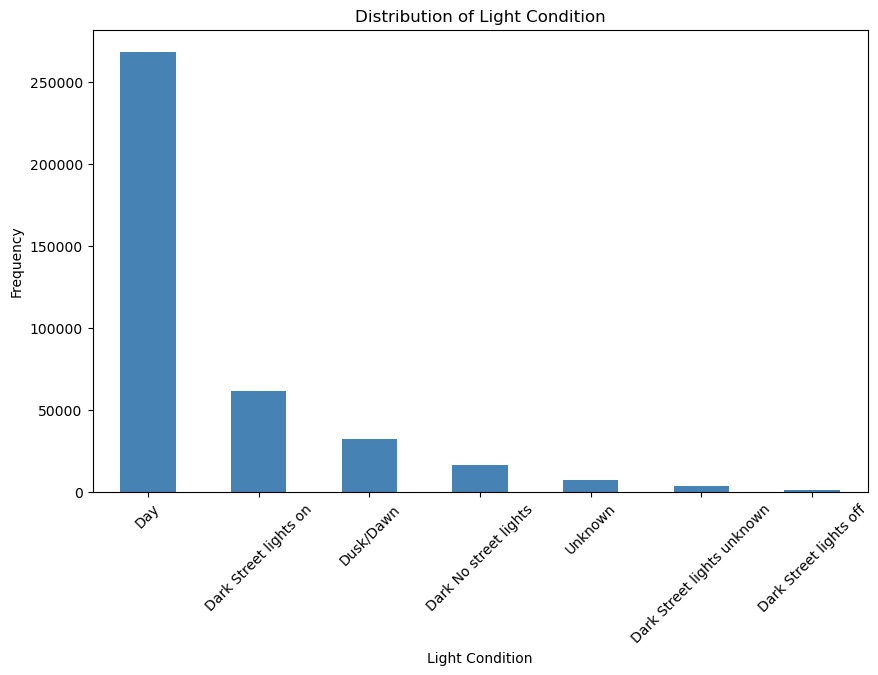

In [50]:
# Count the occurrences of each light condition
light_condition_counts = base['light_condition_desc'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
light_condition_counts.plot(kind='bar', color='steelblue')
plt.xlabel('Light Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Light Condition')
plt.xticks(rotation=45)
plt.show()

In [51]:
## Use random imputation to fill Unknowns 
mask = base['light_condition_desc'] == 'Unknown'
num_unknown = mask.sum()
unique_conditions = base.loc[~mask, 'light_condition_desc'].unique()
random_indices = np.random.choice(len(unique_conditions), size=num_unknown)
base.loc[mask, 'light_condition_desc'] = unique_conditions[random_indices]

In [52]:
base[base['road_geometry_desc']=='Unknown']

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
227,T20060000429,A,F,40-49,Other injury,D,1,2,Drivers,2006-01-25,...,145.671330,3814.0,Clear,2003.0,Paved,Car,2.0,No control,2,3.0
3438,T20060005147,A,U,unknown,Other injury,D,9,2,Drivers,2006-05-03,...,145.203896,3175.0,Clear,1991.0,Paved,Car,1.0,No control,2,15.0
3686,T20060005471,A,M,30-39,Serious injury,D,6,4,Motorcyclists,2006-01-24,...,144.852994,3033.0,Raining,1991.0,Paved,Motor Cycle,1.0,No control,3,15.0
4083,T20060005925,A,F,17-21,Not injured,D,1,2,Drivers,2006-06-03,...,144.788278,3030.0,Clear,1998.0,Paved,Car,2.0,No control,1,8.0
4084,T20060005925,B,F,26-29,Serious injury,D,1,2,Drivers,2006-06-03,...,144.788278,3030.0,Clear,1999.0,Paved,Car,1.0,No control,3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547844,T20200012356,A,M,30-39,Not injured,D,1,2,Drivers,2020-06-26,...,145.192971,3170.0,Clear,2016.0,Paved,Station Wagon,2.0,No control,1,4.0
547845,T20200012356,B,M,30-39,Serious injury,D,1,2,Drivers,2020-06-26,...,145.192971,3170.0,Clear,2008.0,Paved,Utility,2.0,No control,3,12.0
547846,T20200012356,C,M,70+,Serious injury,D,1,2,Drivers,2020-06-26,...,145.192971,3170.0,Clear,1998.0,Paved,Car,1.0,No control,3,22.0
547878,T20200012420,A,F,30-39,Serious injury,D,1,2,Drivers,2020-06-27,...,144.940026,3051.0,Clear,2018.0,Paved,Car,1.0,Stop-go lights,3,2.0


In [53]:
base['road_geometry_desc'].value_counts()

Not at intersection      177039
Cross intersection       103577
T intersection            98687
Multiple intersection      8667
Y intersection             1109
Unknown                     673
Dead end                    196
Private property              9
Road closure                  6
Name: road_geometry_desc, dtype: int64

In [54]:
## Use random imputation to fill Unknowns 
mask = base['road_geometry_desc'] == 'Unknown'
num_unknown = mask.sum()
unique_conditions = base.loc[~mask, 'road_geometry_desc'].unique()
random_indices = np.random.choice(len(unique_conditions), size=num_unknown)
base.loc[mask, 'road_geometry_desc'] = unique_conditions[random_indices]

In [55]:
base['road_geometry_desc'].value_counts()

Not at intersection      177138
Cross intersection       103658
T intersection            98772
Multiple intersection      8753
Y intersection             1193
Dead end                    286
Road closure                 84
Private property             79
Name: road_geometry_desc, dtype: int64

In [56]:
base[base['surface_cond_desc']=='Unknown']

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
215,T20060000414,A,M,40-49,Other injury,D,1,2,Drivers,2006-01-25,...,145.092569,3931.0,Clear,2005.0,Paved,Car,1.0,Roundabout,2,1.0
216,T20060000414,B,F,50-59,Other injury,D,1,2,Drivers,2006-01-25,...,145.092569,3931.0,Clear,2001.0,Paved,Bus/Coach,2.0,Roundabout,2,5.0
223,T20060000426,A,M,17-21,Serious injury,D,1,2,Drivers,2006-01-23,...,146.989083,3860.0,Clear,1994.0,Paved,Utility,1.0,No control,3,12.0
379,T20060000596,A,M,17-21,Other injury,D,7,6,Bicyclists,2006-01-26,...,146.390711,3840.0,Clear,NaN,Paved,Bicycle,1.0,No control,2,NaN
501,T20060000847,A,M,30-39,Other injury,D,6,6,Bicyclists,2006-01-02,...,144.984723,3182.0,Raining,NaN,Paved,Bicycle,1.0,Ped. crossing,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550419,T20200017994,B,U,unknown,Not injured,D,9,2,Drivers,2019-12-13,...,144.414022,3340.0,Not known,0.0,Paved,Car,1.0,Giveway sign,1,2019.0
550479,T20200018308,A,M,40-49,Other injury,D,9,2,Drivers,2019-10-11,...,145.002786,3072.0,Not known,2004.0,Paved,Light Commercial Vehicle (Rigid) <= 4.5 Tonnes...,1.0,No control,2,15.0
550484,T20200018363,A,F,60-64,Not injured,D,1,2,Drivers,2020-10-17,...,145.022637,3121.0,Not known,2013.0,Paved,Car,1.0,Unknown,1,7.0
550485,T20200018363,B,M,17-21,Serious injury,D,6,6,Bicyclists,2020-10-17,...,145.022637,3121.0,Not known,0.0,Paved,Bicycle,1.0,Unknown,3,2020.0


In [57]:
## Use random imputation to fill Unknowns 
mask = base['surface_cond_desc'] == 'Unknown'
num_unknown = mask.sum()
unique_conditions = base.loc[~mask, 'surface_cond_desc'].unique()
random_indices = np.random.choice(len(unique_conditions), size=num_unknown)
base.loc[mask, 'surface_cond_desc'] = unique_conditions[random_indices]

In [58]:
base['surface_cond_desc'].value_counts()

Dry      311358
Wet       64140
Muddy      5410
Icy        4967
Snowy      4088
Name: surface_cond_desc, dtype: int64

In [59]:
base[base['road_surface_type_desc']=='Unknown']

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
1279,T20060002154,A,M,50-59,Not injured,D,1,2,Drivers,2006-03-01,...,144.932370,3046.0,Not known,1988.0,Unknown,Car,2.0,Unknown,1,18.0
1280,T20060002154,B,F,13-15,Other injury,D,7,6,Bicyclists,2006-03-01,...,144.932370,3046.0,Not known,NaN,Unknown,Bicycle,1.0,No control,2,NaN
1991,T20060003129,A,M,30-39,Serious injury,D,6,4,Motorcyclists,2006-01-15,...,142.353869,3494.0,Clear,NaN,Unknown,Motor Cycle,1.0,No control,3,NaN
2193,T20060003295,A,F,17-21,Other injury,D,1,2,Drivers,2006-05-01,...,145.057071,3192.0,Clear,2005.0,Unknown,Car,1.0,Stop-go lights,2,1.0
2194,T20060003295,B,F,22-25,Not injured,D,1,2,Drivers,2006-05-01,...,145.057071,3192.0,Clear,1999.0,Unknown,Car,1.0,Stop-go lights,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549478,T20200015168,B,M,26-29,Not injured,D,1,2,Drivers,2020-08-13,...,145.092757,3127.0,Clear,2011.0,Unknown,Car,1.0,No control,1,9.0
550069,T20200016427,A,M,50-59,Other injury,D,1,2,Drivers,2020-04-22,...,145.306576,3805.0,Not known,2015.0,Unknown,Car,1.0,No control,2,5.0
550070,T20200016427,B,M,40-49,Not injured,D,1,2,Drivers,2020-04-22,...,145.306576,3805.0,Not known,2005.0,Unknown,Car,1.0,No control,1,15.0
550498,T20200018422,A,M,50-59,Serious injury,D,9,4,Motorcyclists,2020-10-17,...,144.154709,3556.0,Clear,2017.0,Unknown,Motor Cycle,1.0,No control,3,3.0


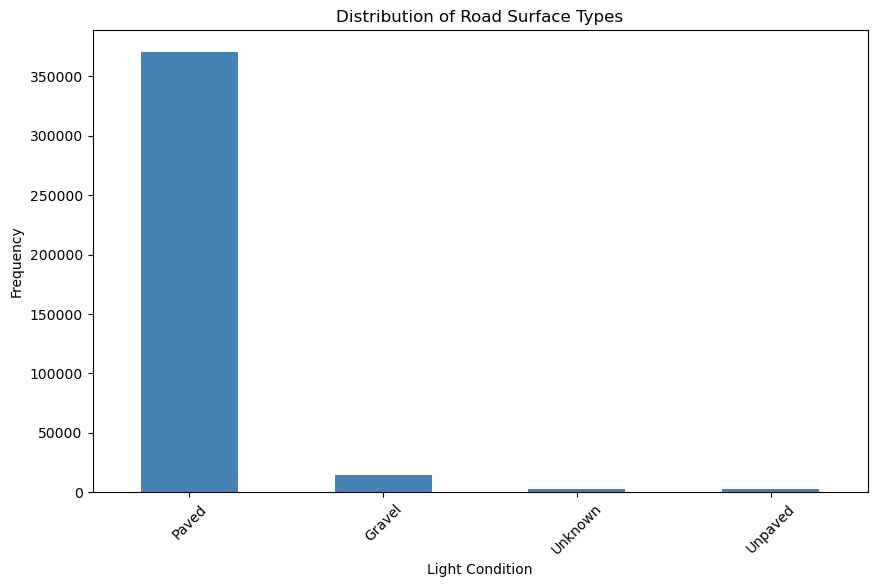

In [60]:
# Count the occurrences of each light condition
road_surface_type_counts = base['road_surface_type_desc'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
road_surface_type_counts.plot(kind='bar', color='steelblue')
plt.xlabel('Light Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Road Surface Types')
plt.xticks(rotation=45)
plt.show()

In [61]:
## Use random imputation to fill Unknowns 
mask = base['road_surface_type_desc'] == 'Unknown'
num_unknown = mask.sum()
unique_conditions = base.loc[~mask, 'road_surface_type_desc'].unique()
random_indices = np.random.choice(len(unique_conditions), size=num_unknown)
base.loc[mask, 'road_surface_type_desc'] = unique_conditions[random_indices]

In [62]:
base['road_surface_type_desc'].value_counts()

Paved      371239
Gravel      15489
Unpaved      3235
Name: road_surface_type_desc, dtype: int64

In [63]:
base[base['traffic_control_desc']=='Unknown']

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
42,T20060000095,A,F,50-59,Not injured,D,1,2,Drivers,2006-01-16,...,145.214124,3175.0,Clear,2002.0,Paved,Car,1.0,Unknown,1,4.0
43,T20060000095,B,F,30-39,Other injury,D,1,2,Drivers,2006-01-16,...,145.214124,3175.0,Clear,2005.0,Paved,Station Wagon,3.0,Unknown,2,1.0
390,T20060000619,B,M,40-49,Serious injury,D,6,6,Bicyclists,2006-01-29,...,144.991191,3936.0,Clear,NaN,Paved,Bicycle,1.0,Unknown,3,NaN
695,T20060001209,A,F,17-21,Other injury,D,1,2,Drivers,2006-04-02,...,146.417827,3840.0,Clear,1989.0,Paved,Car,1.0,Unknown,2,17.0
762,T20060001366,B,U,22-25,Serious injury,D,6,6,Bicyclists,2006-07-02,...,144.656417,3223.0,Clear,NaN,Paved,Bicycle,1.0,Unknown,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550402,T20200017873,B,F,30-39,Not injured,D,1,2,Drivers,2019-05-29,...,145.123086,3128.0,Raining,2012.0,Paved,Car,1.0,Unknown,1,7.0
550484,T20200018363,A,F,60-64,Not injured,D,1,2,Drivers,2020-10-17,...,145.022637,3121.0,Not known,2013.0,Paved,Car,1.0,Unknown,1,7.0
550485,T20200018363,B,M,17-21,Serious injury,D,6,6,Bicyclists,2020-10-17,...,145.022637,3121.0,Not known,0.0,Paved,Bicycle,1.0,Unknown,3,2020.0
550508,T20200018460,A,M,22-25,Serious injury,D,6,4,Motorcyclists,2020-09-20,...,145.088236,3167.0,Clear,2012.0,Paved,Motor Cycle,1.0,Unknown,3,8.0


In [64]:
base['traffic_control_desc'].value_counts()

No control         238857
Stop-go lights      80342
Giveway sign        24620
Roundabout          13415
Unknown             13101
Stop sign            9040
Other                4559
Ped. crossing        2481
Ped. lights          1157
RX Gates/Booms        554
Out of order          498
Flashing lights       477
Police                446
School Flags          182
School No flags        89
RX No control          75
RX Bells/Lights        70
Name: traffic_control_desc, dtype: int64

In [65]:
## Use random imputation to fill Unknowns 
mask = base['traffic_control_desc'] == 'Unknown'
num_unknown = mask.sum()
unique_conditions = base.loc[~mask, 'traffic_control_desc'].unique()
random_indices = np.random.choice(len(unique_conditions), size=num_unknown)
base.loc[mask, 'traffic_control_desc'] = unique_conditions[random_indices]

In [66]:
base['traffic_control_desc'].value_counts()

No control         239692
Stop-go lights      81165
Giveway sign        25426
Roundabout          14178
Stop sign            9905
Other                5351
Ped. crossing        3273
Ped. lights          2011
RX Gates/Booms       1396
Police               1303
Flashing lights      1292
Out of order         1291
School Flags         1027
RX No control         915
RX Bells/Lights       869
School No flags       869
Name: traffic_control_desc, dtype: int64

In [67]:
base['age_group'].value_counts()

30-39      79299
40-49      68485
50-59      51619
17-21      41909
22-25      41873
26-29      37504
70+        22874
60-64      17878
64-69      12343
unknown    11630
16-17       2472
13-15       1160
5-Dec        890
0-4           27
Name: age_group, dtype: int64

In [68]:
## Use random imputation to fill Unknowns 
mask = base['age_group'] == 'unknown'
num_unknown = mask.sum()
unique_conditions = base.loc[~mask, 'age_group'].unique()
random_indices = np.random.choice(len(unique_conditions), size=num_unknown)
base.loc[mask, 'age_group'] = unique_conditions[random_indices]

In [69]:
base['age_group'].value_counts()

30-39    80180
40-49    69350
50-59    52535
17-21    42786
22-25    42751
26-29    38406
70+      23847
60-64    18801
64-69    13197
16-17     3382
13-15     2048
5-Dec     1762
0-4        918
Name: age_group, dtype: int64

In [70]:
categorical_columns = ['sex', 'age_group', 'inj_level_desc', 'helmet_belt_worn', 'road_user_type', 'road_user_type_desc', 'accident_type_desc', 'day_week_description', 'dca_description', 'light_condition_desc', 'road_geometry_desc', 'surface_cond_desc', 'road_name', 'road_type', 'lga_name', 'region_name', 'deg_urban_name', 'atmosph_cond_desc', 'road_surface_type_desc', 'vehicle_type_desc', 'traffic_control_desc']

for column in categorical_columns:
    if 'Not known' in base[column].unique():
        unknown_count = base[column].value_counts()['Not known']
        print(f"Column: {column}, Unknown Count: {unknown_count}")
    else:
        print(f"Column: {column}, Unknown Count: 0")

Column: sex, Unknown Count: 0
Column: age_group, Unknown Count: 0
Column: inj_level_desc, Unknown Count: 0
Column: helmet_belt_worn, Unknown Count: 0
Column: road_user_type, Unknown Count: 0
Column: road_user_type_desc, Unknown Count: 0
Column: accident_type_desc, Unknown Count: 0
Column: day_week_description, Unknown Count: 0
Column: dca_description, Unknown Count: 0
Column: light_condition_desc, Unknown Count: 0
Column: road_geometry_desc, Unknown Count: 0
Column: surface_cond_desc, Unknown Count: 0
Column: road_name, Unknown Count: 0
Column: road_type, Unknown Count: 0
Column: lga_name, Unknown Count: 0
Column: region_name, Unknown Count: 0
Column: deg_urban_name, Unknown Count: 0
Column: atmosph_cond_desc, Unknown Count: 27068
Column: road_surface_type_desc, Unknown Count: 0
Column: vehicle_type_desc, Unknown Count: 0
Column: traffic_control_desc, Unknown Count: 0


In [71]:
base[base['atmosph_cond_desc']=='Not known']

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
44,T20060000096,A,F,22-25,Other injury,D,1,2,Drivers,2006-01-17,...,144.737491,3030.0,Not known,2005.0,Paved,Car,1.0,No control,2,1.0
126,T20060000272,A,F,70+,Not injured,D,9,2,Drivers,2006-12-01,...,145.026028,3161.0,Not known,1996.0,Paved,Car,1.0,Stop-go lights,1,10.0
127,T20060000272,B,M,40-49,Serious injury,D,1,2,Drivers,2006-12-01,...,145.026028,3161.0,Not known,1988.0,Paved,Car,1.0,Stop-go lights,3,18.0
572,T20060001001,A,F,30-39,Not injured,D,9,2,Drivers,2006-01-24,...,145.325071,3805.0,Not known,2002.0,Paved,Rigid Truck(Weight Unknown),1.0,No control,1,4.0
573,T20060001001,B,F,50-59,Other injury,D,1,2,Drivers,2006-01-24,...,145.325071,3805.0,Not known,2004.0,Paved,Car,1.0,No control,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550529,T20200018702,B,M,40-49,Not injured,D,9,2,Drivers,2019-09-30,...,145.338113,3806.0,Not known,2012.0,Paved,Utility,1.0,No control,1,7.0
550532,T20200018733,A,M,26-29,Not injured,D,9,2,Drivers,2020-10-20,...,144.967472,3182.0,Not known,2013.0,Paved,Car,1.0,Other,1,7.0
550533,T20200018733,B,F,17-21,Serious injury,D,6,6,Bicyclists,2020-10-20,...,144.967472,3182.0,Not known,0.0,Paved,Bicycle,1.0,Other,3,2020.0
550545,T20200018881,A,M,26-29,Serious injury,D,9,4,Motorcyclists,2020-10-27,...,144.961334,3058.0,Not known,2017.0,Paved,Motor Cycle,1.0,Stop-go lights,3,3.0


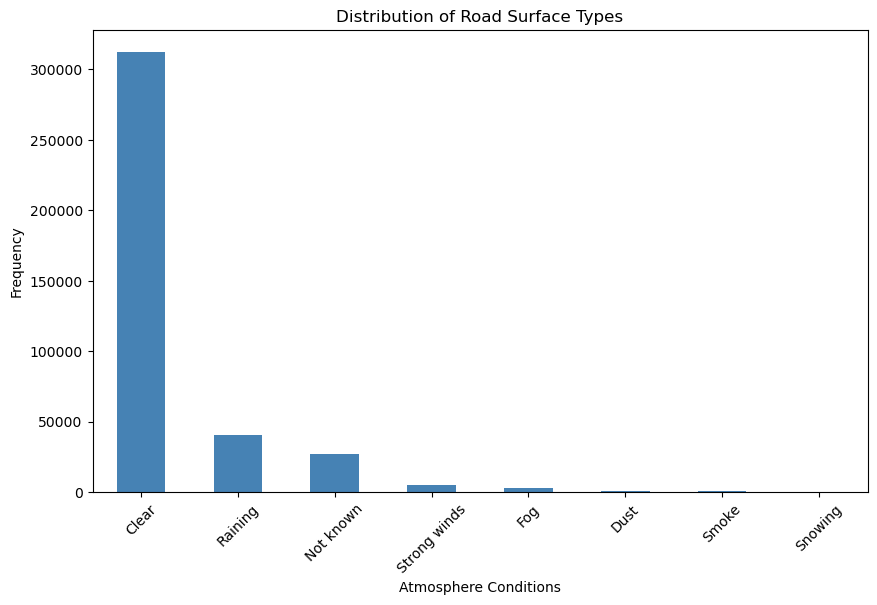

In [72]:
# Count the occurrences of each light condition
atmosph_cond_counts = base['atmosph_cond_desc'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
atmosph_cond_counts.plot(kind='bar', color='steelblue')
plt.xlabel('Atmosphere Conditions')
plt.ylabel('Frequency')
plt.title('Distribution of Road Surface Types')
plt.xticks(rotation=45)
plt.show()

In [73]:
base['atmosph_cond_desc'].value_counts()

Clear           312397
Raining          40596
Not known        27068
Strong winds      5249
Fog               3078
Dust               832
Smoke              504
Snowing            239
Name: atmosph_cond_desc, dtype: int64

In [74]:
## Use random imputation to fill Unknowns 
mask = base['atmosph_cond_desc'] == 'Not known'
num_unknown = mask.sum()
unique_conditions = base.loc[~mask, 'atmosph_cond_desc'].unique()
random_indices = np.random.choice(len(unique_conditions), size=num_unknown)
base.loc[mask, 'atmosph_cond_desc'] = unique_conditions[random_indices]

In [75]:
base['atmosph_cond_desc'].value_counts()

Clear           316307
Raining          44434
Strong winds      9006
Fog               6981
Dust              4743
Smoke             4348
Snowing           4144
Name: atmosph_cond_desc, dtype: int64

In [76]:
base['year_of_vehicle'].nlargest(10)

534735    2020.0
534780    2020.0
534782    2020.0
534784    2020.0
534789    2020.0
534792    2020.0
534793    2020.0
534810    2020.0
534822    2020.0
534823    2020.0
Name: year_of_vehicle, dtype: float64

In [77]:
base.isnull().sum()

accident_no                   0
vehicle_id                    0
sex                           0
age_group                     0
inj_level_desc                0
seating_position              0
helmet_belt_worn              0
road_user_type                0
road_user_type_desc           0
accidentdate                  0
accidenttime                  0
accident_type_desc            0
day_week_description          0
dca_description               0
light_condition_desc          0
no_of_vehicles                0
no_persons                    0
no_persons_killed             0
road_geometry                 0
road_geometry_desc            0
severity                      0
speed_zone                    0
surface_cond_desc             0
road_name                     0
road_type                     0
distance_location             0
lga_name                      0
region_name                   0
deg_urban_name                0
lat                           0
long                          0
postcode

In [78]:
base.nlargest(10, 'year_of_vehicle')

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,...,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
534735,T20200000019,B,M,60-64,Other injury,D,6,6,Bicyclists,2020-01-01,...,145.026719,3078.0,Clear,0.0,Paved,Bicycle,1.0,Stop sign,2,2020.0
534780,T20200000060,B,M,50-59,Other injury,D,6,6,Bicyclists,2020-01-01,...,144.946573,3044.0,Clear,0.0,Paved,Bicycle,1.0,No control,2,2020.0
534782,T20200000061,B,M,40-49,Other injury,D,9,6,Bicyclists,2020-01-01,...,145.044236,3122.0,Clear,0.0,Paved,Bicycle,1.0,No control,2,2020.0
534784,T20200000062,B,M,40-49,Other injury,D,8,6,Bicyclists,2020-01-01,...,145.068689,3165.0,Clear,0.0,Paved,Bicycle,1.0,No control,2,2020.0
534789,T20200000078,B,M,30-39,Other injury,D,6,6,Bicyclists,2020-02-01,...,145.078321,3166.0,Clear,0.0,Paved,Bicycle,1.0,No control,2,2020.0
534792,T20200000079,B,M,30-39,Other injury,D,6,6,Bicyclists,2020-02-01,...,145.051922,3190.0,Clear,0.0,Paved,Bicycle,1.0,Stop-go lights,2,2020.0
534793,T20200000079,B,M,30-39,Other injury,D,6,6,Bicyclists,2020-02-01,...,145.051922,3192.0,Clear,0.0,Paved,Bicycle,1.0,Stop-go lights,2,2020.0
534810,T20200000096,B,M,26-29,Other injury,D,6,6,Bicyclists,2020-02-01,...,144.961582,3000.0,Clear,0.0,Paved,Bicycle,1.0,Stop-go lights,2,2020.0
534822,T20200000100,A,M,40-49,Other injury,D,1,2,Drivers,2020-02-01,...,144.326333,3217.0,Clear,0.0,Paved,Utility,1.0,Stop-go lights,2,2020.0
534823,T20200000100,B,M,50-59,Not injured,D,1,2,Drivers,2020-02-01,...,144.326333,3217.0,Clear,0.0,Paved,Station Wagon,8.0,Stop-go lights,1,2020.0


In [79]:
base['vehicle_year_manuf']== 0.

3         False
4         False
5         False
8         False
9         False
          ...  
550567    False
550570    False
550571     True
550573    False
550576    False
Name: vehicle_year_manuf, Length: 389963, dtype: bool

In [80]:
base[base['vehicle_year_manuf'] == 0]['vehicle_type_desc'].value_counts()

Bicycle                                               10098
Car                                                    1843
Motor Cycle                                             873
Station Wagon                                           459
Tram                                                    358
Utility                                                 324
Panel Van                                               172
Other Vehicle                                           103
Prime Mover - Single Trailer                             90
Taxi                                                     79
Heavy Vehicle (Rigid) > 4.5 Tonnes                       78
Bus/Coach                                                55
Prime Mover B-Double                                     55
Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM       40
Quad Bike                                                29
Prime Mover Only                                         26
Motor Scooter                           

In [81]:
base[base['vehicle_year_manuf'] == 0]['severity_level'].value_counts()

2    8311
3    3442
1    3013
Name: severity_level, dtype: int64

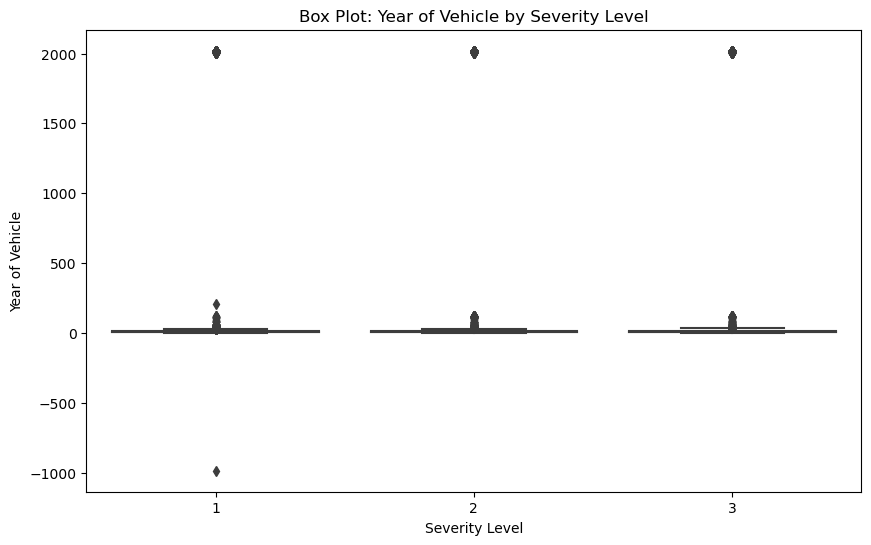

In [82]:

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=base, x='severity_level', y='year_of_vehicle')

# Set the labels and title
plt.xlabel('Severity Level')
plt.ylabel('Year of Vehicle')
plt.title('Box Plot: Year of Vehicle by Severity Level')

# Show the plot
plt.show()

In [83]:
# Calculate the statistics
min_year = base['year_of_vehicle'].min()
max_year = base['year_of_vehicle'].max()
std_year = base['year_of_vehicle'].std()
iqr_year = base['year_of_vehicle'].quantile(0.75) - base['year_of_vehicle'].quantile(0.25)
mean_year = base['year_of_vehicle'].mean()

# Print the statistics
print("Minimum Year of Vehicle:", min_year)
print("Maximum Year of Vehicle:", max_year)
print("Standard Deviation of Year of Vehicle:", std_year)
print("Interquartile Range (IQR) of Year of Vehicle:", iqr_year)
print("Mean of Year of Vehicle:", mean_year)

Minimum Year of Vehicle: -986.0
Maximum Year of Vehicle: 2020.0
Standard Deviation of Year of Vehicle: 394.39971974862465
Interquartile Range (IQR) of Year of Vehicle: 11.0
Mean of Year of Vehicle: 90.27286941220373


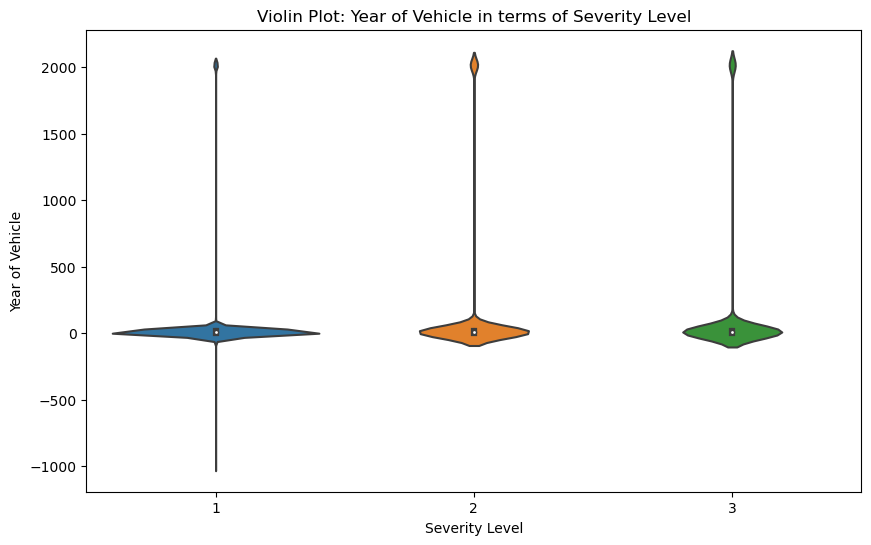

In [84]:
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=base['severity_level'], y=base['year_of_vehicle'])
plt.xlabel('Severity Level')
plt.ylabel('Year of Vehicle')
plt.title('Violin Plot: Year of Vehicle in terms of Severity Level')

# Show the plot
plt.show()

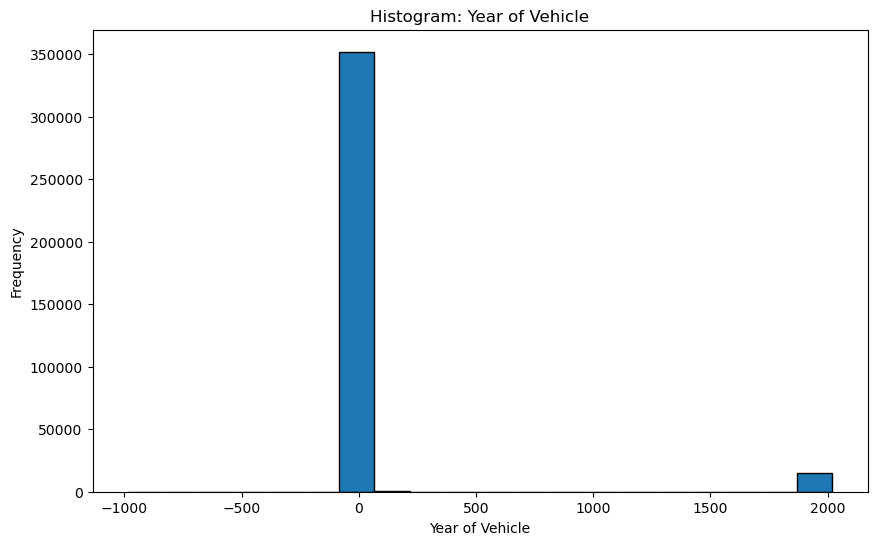

In [86]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(base['year_of_vehicle'], bins=20, edgecolor='black')
plt.xlabel('Year of Vehicle')
plt.ylabel('Frequency')
plt.title('Histogram: Year of Vehicle')

# Show the plot
plt.show()

In [87]:
base['year_of_vehicle'].value_counts()

1.0      23110
2.0      22632
3.0      21939
4.0      20782
5.0      20561
         ...  
106.0        1
99.0         1
96.0         1
73.0         1
88.0         1
Name: year_of_vehicle, Length: 130, dtype: int64

In [88]:
base['year_of_vehicle'].describe()

count    367117.000000
mean         90.272869
std         394.399720
min        -986.000000
25%           4.000000
50%           9.000000
75%          15.000000
max        2020.000000
Name: year_of_vehicle, dtype: float64

In [89]:
base['vehicle_year_manuf'].describe()

count    367117.000000
mean       1922.710983
std         393.702543
min           0.000000
25%        1998.000000
50%        2004.000000
75%        2009.000000
max        3001.000000
Name: vehicle_year_manuf, dtype: float64

In [95]:
base['vehicle_type_desc'].unique()

array(['Car', 'Taxi', 'Utility', 'Motor Cycle',
       'Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM', 'Panel Van',
       'Station Wagon', 'Prime Mover (No of Trailers Unknown)',
       'Heavy Vehicle (Rigid) > 4.5 Tonnes', 'Bicycle', 'Other Vehicle',
       'Rigid Truck(Weight Unknown)', 'Motor Scooter', 'Bus/Coach',
       'Mini Bus(9-13 seats)', 'Moped', 'Tram', 'Prime Mover Only',
       'Train', 'Prime Mover - Single Trailer', 'Prime Mover B-Double',
       'Horse (ridden or drawn)', 'Prime Mover B-Triple', 'Quad Bike',
       'Plant machinery and Agricultural equipment'], dtype=object)

In [97]:
base[base['vehicle_type_desc'] == 'Bicycle']['vehicle_year_manuf'].value_counts()

0.0    10098
Name: vehicle_year_manuf, dtype: int64

In [99]:
base[base['vehicle_type_desc'] == 'Car']['vehicle_year_manuf'].describe()

count    203480.000000
mean       1984.175629
std         189.851199
min           0.000000
25%        1997.000000
50%        2003.000000
75%        2008.000000
max        2020.000000
Name: vehicle_year_manuf, dtype: float64

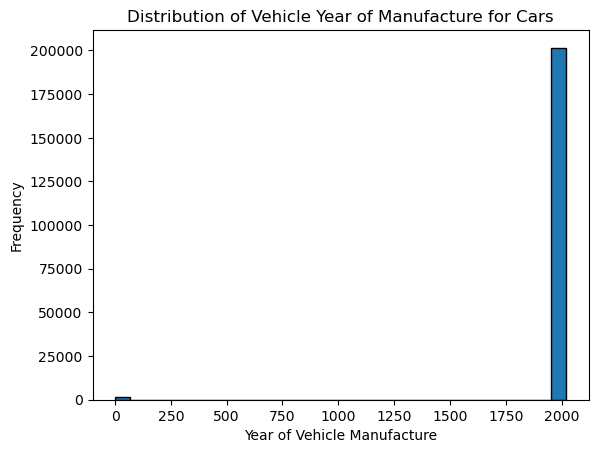

In [100]:
car_years = base[base['vehicle_type_desc'] == 'Car']['vehicle_year_manuf']
plt.hist(car_years, bins=30, edgecolor='black')
plt.xlabel('Year of Vehicle Manufacture')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Year of Manufacture for Cars')
plt.show()

In [103]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)
base[(base['vehicle_type_desc'] == 'Car') & (base['vehicle_year_manuf'] == 0)]

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_of_vehicles,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc,vehicle_type_desc,total_no_occupants,traffic_control_desc,severity_level,year_of_vehicle
6647,T20060008881,B,F,30-39,Not injured,D,9,2,Drivers,2006-03-23,09:00:00,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),Day,2,3,0,2,T intersection,2,60,Dry,POINT NEPEAN,ROAD,0.0,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-38.336363,144.957169,3936.0,Clear,0.0,Paved,Car,1.0,Stop-go lights,1,2006.0
9092,T20060011768,A,M,26-29,Other injury,D,1,2,Drivers,2006-04-04,22:15:00,Collision with a fixed object,Tuesday,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE ...,Dark Street lights on,1,2,0,5,Not at intersection,3,50,Dry,LLOYD,STREET,45.0,BOROONDARA,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.799991,145.079195,3104.0,Clear,0.0,Paved,Car,2.0,No control,2,2006.0
14330,T20060019605,A,M,22-25,Serious injury,D,1,2,Drivers,2006-05-13,17:40:00,Collision with vehicle,Saturday,RIGHT THROUGH,Dark Street lights on,2,4,0,2,T intersection,2,80,Dry,PRINCES,HIGHWAY,0.0,WYNDHAM,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.892691,144.683221,3030.0,Clear,0.0,Paved,Car,3.0,No control,3,2006.0
15129,T20060020893,B,F,40-49,Other injury,D,1,2,Drivers,2006-05-21,07:40:00,Collision with vehicle,Sunday,RIGHT REAR.,Day,2,2,0,5,Not at intersection,3,100,Dry,MIDLAND,HIGHWAY,170.0,SHEPPARTON,NORTH EASTERN REGION,RURAL_VICTORIA,-36.415190,145.561220,3631.0,Clear,0.0,Paved,Car,1.0,No control,2,2006.0
15334,T20060021203,A,U,40-49,Not injured,D,9,2,Drivers,2006-03-30,10:00:00,Collision with vehicle,Thursday,LANE CHANGE LEFT (NOT OVERTAKING),Day,2,2,0,1,Cross intersection,2,60,Dry,CHAPEL,STREET,10.0,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.861374,144.991617,3182.0,Clear,0.0,Paved,Car,1.0,No control,1,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549753,T20200015685,A,M,17-21,Not injured,D,1,2,Drivers,2020-08-26,10:56:00,Collision with vehicle,Wednesday,RIGHT THROUGH,Day,2,3,0,2,T intersection,3,60,Dry,CAROLINE SPRINGS,BOULEVARD,0.0,MELTON,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.729568,144.741613,3023.0,Clear,0.0,Paved,Car,2.0,Stop-go lights,1,2020.0
549861,T20200015842,A,F,17-21,Serious injury,D,9,2,Drivers,2020-08-29,14:30:00,Collision with a fixed object,Saturday,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,Day,1,1,0,5,Not at intersection,2,100,Dry,BARNAWARTHA,ROAD,320.0,INDIGO,NORTH EASTERN REGION,RURAL_VICTORIA,-36.050487,146.677372,3688.0,Clear,0.0,Paved,Car,1.0,No control,3,2020.0
550057,T20200016387,B,U,13-15,Not injured,D,9,2,Drivers,2020-04-16,16:30:00,Collision with vehicle,Thursday,OTHER OPPOSING MANOEUVRES NOT INCLUDED IN DCAs...,Day,2,2,0,5,Not at intersection,3,50,Dry,CLINCH,AVENUE,22.0,DAREBIN,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.737478,145.001079,3072.0,Clear,0.0,Paved,Car,1.0,No control,1,2020.0
550136,T20200016582,B,U,30-39,Not injured,NK,9,2,Drivers,2020-09-13,23:35:00,Struck Pedestrian,Sunday,PED STRUCK WALKING TO/FROM OR BOARDING/ALIGHTI...,Dark Street lights on,2,2,0,5,Not at intersection,2,50,Wet,HART,STREET,89.0,COLAC OTWAY,SOUTH WESTERN REGION,SMALL_CITIES,-38.346098,143.580095,3250.0,Raining,0.0,Paved,Car,1.0,No control,1,2020.0


In [104]:
vehicle_make = pd.read_csv('vehicle_make.csv')

In [105]:
vehicle_make.columns = vehicle_make.columns.str.lower().str.replace(' ', '_')

In [107]:
base = pd.merge(base, vehicle_make, on=['accident_no', 'vehicle_id'], how='left')

In [108]:
base.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_of_vehicles,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,vehicle_power,vehicle_type_desc_y,vehicle_weight,fuel_type,no_of_cylinders,tare_weight,carry_capacity,cubic_capacity,trailer_type,caught_fire,initial_impact,lamps,level_of_damage,traffic_control_desc_y
0,T20060000010,A,M,70+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA,NaN,Car,NaN,Z,NaN,1100.0,1100.0,NaN,H,2,F,2,3,Stop-go lights
1,T20060000010,B,F,60-64,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ,NaN,Car,NaN,Z,NaN,974.0,974.0,NaN,H,2,2,2,3,Stop-go lights
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON,NaN,Taxi,NaN,Z,NaN,1550.0,1550.0,NaN,H,2,F,2,2,Stop-go lights
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,2,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU,NaN,Utility,2730.0,Z,NaN,1500.0,1230.0,NaN,H,2,9,0,3,No control
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,2,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER,NaN,Car,NaN,Z,NaN,1200.0,1200.0,NaN,H,2,F,0,5,Giveway sign


In [116]:
base.isnull().sum()

accident_no                      0
vehicle_id                       0
sex                              0
age_group                        0
inj_level_desc                   0
seating_position                 0
helmet_belt_worn                 0
road_user_type                   0
road_user_type_desc              0
accidentdate                     0
accidenttime                     0
accident_type_desc               0
day_week_description             0
dca_description                  0
light_condition_desc             0
no_of_vehicles                   0
no_persons                       0
no_persons_killed                0
road_geometry                    0
road_geometry_desc               0
severity                         0
speed_zone                       0
surface_cond_desc                0
road_name                        0
road_type                        0
distance_location                0
lga_name                         0
region_name                      0
deg_urban_name      

In [117]:
base = base.iloc[:, :-10]

In [118]:
base.isnull().sum()

accident_no                      0
vehicle_id                       0
sex                              0
age_group                        0
inj_level_desc                   0
seating_position                 0
helmet_belt_worn                 0
road_user_type                   0
road_user_type_desc              0
accidentdate                     0
accidenttime                     0
accident_type_desc               0
day_week_description             0
dca_description                  0
light_condition_desc             0
no_of_vehicles                   0
no_persons                       0
no_persons_killed                0
road_geometry                    0
road_geometry_desc               0
severity                         0
speed_zone                       0
surface_cond_desc                0
road_name                        0
road_type                        0
distance_location                0
lga_name                         0
region_name                      0
deg_urban_name      

In [119]:
base = base.iloc[:, :-4]

In [120]:
base.isnull().sum()

accident_no                     0
vehicle_id                      0
sex                             0
age_group                       0
inj_level_desc                  0
seating_position                0
helmet_belt_worn                0
road_user_type                  0
road_user_type_desc             0
accidentdate                    0
accidenttime                    0
accident_type_desc              0
day_week_description            0
dca_description                 0
light_condition_desc            0
no_of_vehicles                  0
no_persons                      0
no_persons_killed               0
road_geometry                   0
road_geometry_desc              0
severity                        0
speed_zone                      0
surface_cond_desc               0
road_name                       0
road_type                       0
distance_location               0
lga_name                        0
region_name                     0
deg_urban_name                  0
lat           

In [121]:
base = base.loc[:, ~base.columns.duplicated()]

In [122]:
base

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_of_vehicles,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model
0,T20060000010,A,M,70+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1,10.0,Paved,V,SEDAN,MITSUB,MAGNA
1,T20060000010,B,F,60-64,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2,3.0,Paved,V,COUPE,UNKN,GETZ
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,3,6,0,1,Cross intersection,3,60,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1,5.0,Paved,V,SEDAN,FORD,FALCON
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,2,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1,8.0,Paved,V,DC UTE,TOYOTA,HILXU
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,2,4,0,2,T intersection,3,70,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2,15.0,Paved,V,SEDAN,SUBARU,LIBER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389958,T20200019195,B,M,22-25,Serious injury,D,6,4,Motorcyclists,2020-10-31,15:16:00,Collision with vehicle,Saturday,RIGHT THROUGH,Day,2,2,0,2,T intersection,2,40,Dry,VICTORIA,STREET,0.0,YARRA,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.810825,145.003211,3121.0,Clear,2016.0,Paved,Motor Cycle,1.0,No control,3,4.0,Paved,V,SOLO,YAMAHA,MTM850
389959,T20200019239,A,M,30-39,Not injured,D,9,2,Drivers,2020-01-11,12:11:00,Collision with vehicle,Sunday,LEAVING PARKING,Day,2,4,0,5,Not at intersection,2,50,Dry,ALEXANDRA,AVENUE,147.0,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.828081,144.983214,3004.0,Clear,2019.0,Paved,Station Wagon,3.0,No control,1,1.0,Paved,V,WAGON,B M W,X6 30D
389960,T20200019239,B,M,26-29,Serious injury,D,6,6,Bicyclists,2020-01-11,12:11:00,Collision with vehicle,Sunday,LEAVING PARKING,Day,2,4,0,5,Not at intersection,2,50,Dry,ALEXANDRA,AVENUE,147.0,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.828081,144.983214,3004.0,Clear,0.0,Paved,Bicycle,1.0,No control,3,2020.0,Paved,,,,
389961,T20200019247,A,M,17-21,Serious injury,D,1,2,Drivers,2020-01-11,15:30:00,Collision with a fixed object,Sunday,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,Day,1,2,0,5,Not at intersection,2,999,Dry,MATTHEWS,ROAD,413.0,GEELONG,SOUTH WESTERN REGION,TOWNS,-38.213352,144.443982,3224.0,Clear,2006.0,Gravel,Car,2.0,No control,3,14.0,Gravel,V,SEDAN,VOLKS,GOLF


In [124]:
base.columns

Index(['accident_no', 'vehicle_id', 'sex', 'age_group', 'inj_level_desc',
       'seating_position', 'helmet_belt_worn', 'road_user_type',
       'road_user_type_desc', 'accidentdate', 'accidenttime',
       'accident_type_desc', 'day_week_description', 'dca_description',
       'light_condition_desc', 'no_of_vehicles', 'no_persons',
       'no_persons_killed', 'road_geometry', 'road_geometry_desc', 'severity',
       'speed_zone', 'surface_cond_desc', 'road_name', 'road_type',
       'distance_location', 'lga_name', 'region_name', 'deg_urban_name', 'lat',
       'long', 'postcode_no', 'atmosph_cond_desc', 'vehicle_year_manuf',
       'road_surface_type_desc_x', 'vehicle_type_desc_x', 'total_no_occupants',
       'traffic_control_desc_x', 'severity_level', 'year_of_vehicle',
       'road_surface_type_desc_y', 'reg_state', 'vehicle_body_style',
       'vehicle_make', 'vehicle_model'],
      dtype='object')

In [125]:
base.to_csv('eda_capstone.csv', index=False)